# Miniprojects - Lecture 3

For this mini project, you will be working with open data from the City Archives Amsterdam: https://www.amsterdam.nl/stadsarchief/amsterdam-city-archives/, on which you will be performing some gender-guessing. As a backbone model, we will use a pretrained model: https://github.com/lead-ratings/gender-guesser.


The first project is a straight-forward metadata extension with https://archief.amsterdam/uitleg/indexen/58-confessieboeken-1535-1732. We try to add the gender of those being interrogated. The typical problems occur like old Dutch first names that are not known, names that change gender, etc.

The second project is using patient registers: https://archief.amsterdam/uitleg/indexen/42-patientenregisters-1818-1899. They contain female and male departments these patients are in. We can therefore somewhat derive the gender of them. The rest is the same as above but this time as a predictive exercise.

The (BONUS - NOT MANDATORY) third project is about the quantification of gender, but with a different dataset and approach.

## About Grading of the Mini-Projects:

The third project is not necessary to pass. To encourage you to try them, we’ll add 20–40 bonus points to these projects. These points are not required to pass the course, so if you decide to skip them, it won’t hurt your grade as long as you complete the other assignments.

For example, even if you skip a mini-project worth 40 points but do well in everything else, you can still score 80 out of 100. That’s a solid passing grade!

This structure gives you the freedom to challenge yourself if you’d like while ensuring your grade isn’t negatively impacted if you don’t participate in these extra mini-projects.

### Download Archive Data and Install gender_guesser

In [48]:
import os
import pandas as pd

!pip install gender_guesser

#wget/curl from archief does not work. Uploaded to github
if not(os.path.exists('confessieboeken')):
  print('Downloading confessieboeken\n')
  !mkdir confessieboeken
  !wget https://github.com/goto4711/cdai/raw/refs/heads/main/saa_index_op_confessieboeken_20181005.zip
  !unzip -q saa_index_op_confessieboeken_20181005 -d confessieboeken
  !rm saa_index_op_confessieboeken_20181005.zip

if not(os.path.exists('patientenregisters')):
  print('Downloading patientenregister\n')
  !mkdir patientenregisters
  !wget https://github.com/goto4711/cdai/raw/refs/heads/main/saa_index_op_patientenregisters_20181005.zip
  !unzip -q saa_index_op_patientenregisters_20181005 -d patientenregisters
  !rm saa_index_op_patientenregisters_20181005.zip

# Project 1: Create Metadata (40pt)

Simply add a column on gender and also check the issues with guessing gender with old Dutch names

Use confessieboeken https://www.amsterdam.nl/stadsarchief/organisatie/open-data/

In [49]:
#Example file
confession_file = "/content/confessieboeken/SAA_Index_op_confessieboeken_20181005_010.xml"


Open the **file**, using this construct:

```
with open('file_name', 'r') as f:
    file = f.read()
```



In [50]:
#1pt

with open(confession_file, 'r') as f:
    file = f.read()


Run the following cell to parse the XML file to extract specific data fields ('voornaam', 'achternaam', 'datumConfessie', 'urlScan') for each record, handling any errors by skipping problematic entries.

In [51]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(file, 'xml')
all_inds = soup.find_all('indexRecord')

data = []

for i in all_inds:
    try:
        first_name = i.find('voornaam').text
        second_name = i.find('achternaam').text
        date = i.find('datumConfessie').text
        urlScan = i.find('urlScan').text
        data.append((first_name, second_name, date, urlScan))
    except:
        continue

Store the collected data in a DataFrame called `confession_df` with columns 'First_Name,' 'Last_Name,' 'Date,' and 'URL'.

In [52]:

confession_df = pd.DataFrame(data, columns=['First_Name', 'Last_Name', 'Date', 'URL'])


Display the first 20 rows of the `confession_df` DataFrame.

In [53]:
#1pt
confession_df.head(20)
confession_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6444 entries, 0 to 6443
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   First_Name  6444 non-null   object
 1   Last_Name   6444 non-null   object
 2   Date        6444 non-null   object
 3   URL         6444 non-null   object
dtypes: object(4)
memory usage: 201.5+ KB


Import `gender_guesser.detector` and give it the alias `gender`. Then, create a gender detector instance named `d` that is not case-sensitive. Hint: to create the instance, you will have to use the `gender.Detector(case_sensitive=)` construct.

In [54]:
#5pt
import gender_guesser.detector as gender
d = gender.Detector(case_sensitive=False)



Create a list named `predicted_genders_confession`. For each first name in the `confession_df` DataFrame, predict the gender using the gender detector `d`, and also store the results in the list you jus created (named `predicted_genders_confession`). Hint: in order to use your gender detector, you need to know which method of `d` to call. Check in the documentation: https://pypi.org/project/gender-guesser/

In [55]:
#10pt
predicted_genders_confession = []
for first_name in confession_df['First_Name']:
    predicted_gender = d.get_gender(first_name)
    predicted_genders_confession.append(predicted_gender)


Add the `predicted_genders_confession` list as a new column, `Predicted_Gender`, to the `confession_df` DataFrame. Then, display the count of each unique gender prediction.

In [56]:
#10pt
confession_df['Predicted_Gender'] = predicted_genders_confession
# Display the count of each unique gender prediction
print(confession_df['Predicted_Gender'].value_counts())


# You should get the following count:
# unknown	2803
# male	2471
# female	982
# mostly_male	105
# mostly_female	50
# andy 33


Predicted_Gender
unknown          2803
male             2471
female            982
mostly_male       105
mostly_female      50
andy               33
Name: count, dtype: int64


Display the first 20 rows of the updated `confession_df` DataFrame, which now includes the `Predicted_Gender` column.

In [57]:
#2pt
confession_df.head(20)


,First_Name,Last_Name,Date,URL,Predicted_Gender
0,Claes,Jansz,1535-01-11,https://archief.amsterdam/inventarissen/invent...,male
1,Job,Jansz,1534-09-20,https://archief.amsterdam/inventarissen/invent...,male
2,Zijbrant,Bouwensz,1534-11-26,https://archief.amsterdam/inventarissen/invent...,unknown
3,Trijn,Jans,1535-03-01,https://archief.amsterdam/inventarissen/invent...,female
4,Lijsbeth,IJsbrants,1535-05-18,https://archief.amsterdam/inventarissen/invent...,unknown
5,Cornelis,Gerijtsz,1535-05-18,https://archief.amsterdam/inventarissen/invent...,male
6,Griete,Claes,1535-05-20,https://archief.amsterdam/inventarissen/invent...,unknown
7,Jacob,Campen,1535-05-20,https://archief.amsterdam/inventarissen/invent...,male
8,Gherbrich,IJsbrants,1535-05-22,https://archief.amsterdam/inventarissen/invent...,unknown
9,Jacob,Campen,1535-06-06,https://archief.amsterdam/inventarissen/invent...,male


Provide a brief response (maximum 150 words) discussing potential issues with the gender prediction model and process used and applied to this dataset. Consider aspects such as accuracy limitations, cultural, linguistic, or other biases, ambiguity, and the ethical implications of assuming gender based on names alone.

In Project 1, I used name-based gender prediction to categorise individuals on a gender basis, but with the results, we faced limitations, particularly with Dutch names. As gender prediction tools typically rely on modern names, they differ significantly from historical names. Also, alot of Dutch names are unisex, or their gender connotations have changed over time. They are making gender prediction a bit different to predict the correct gender. Furthermore, names from non-dutch or minority cultural backgrounds also affected the classification.



# Project 2: Compare Gender guesser results (40pt)

You will now use patientenregisters from https://www.amsterdam.nl/stadsarchief/organisatie/open-data/.

This project uses patient registers from Amsterdam’s city archives to analyze gender classification. The records indicate whether individuals were assigned to the 'afdeling vrouwen' (women’s department) or 'afdeling mannen' (men’s department). These departmental assignments, based on historical binary classifications, will be used as a shorthand for "ground truth" gender.

You will compare this with the gender predictions made by the Python library `gender_guesser` (which we have just learned how to use), which infers gender from first names. The goal is to evaluate the alignment between historical records and algorithmic predictions, noting any discrepancies and their possible causes.

In [58]:
#Example file
patients_file = "/content/patientenregisters/SAA_Index_op_patiЙntenregisters_20181005_010.xml"

Open the **file**, like you did in Project 1:

In [59]:
#1pt
with open(patients_file, 'r') as f:
    file = f.read()




Run this cell to parse the XML file to extract specific data fields ('voornaam', 'achternaam', 'instelling', 'afdeling', 'datering', 'geboorteplaats') for each record. Based on the department ('afdeling'), assign a gender ('female' if "vrouwen" is found, 'male' if "mannen" is found, and 'unknown' otherwise).

In [60]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(file, 'xml')
all_inds = soup.find_all('indexRecord')

irs = []

for i in all_inds:
    try:
        first_name = i.find('voornaam').text
        second_name = i.find('achternaam').text
        institution = i.find('instelling').text
        department = i.find('afdeling').text
        if "vrouwen" in department.lower():
            gender = 'female'
        else:
            if "mannen" in department.lower():
                gender = 'male'
            else:
                gender = 'unknown'
        year = i.find('datering').text
        birth_place = i.find('geboorteplaats').text
        irs.append((first_name, second_name, institution, department, year, birth_place, gender))
    except:
        continue



Store the collected data in a DataFrame called `patients_df`, with columns 'First_Name', 'Last_Name', 'Institution', 'Department', 'Year', 'Birth_Place', and 'Gender'.

In [61]:
#1pt
patients_df = pd.DataFrame(irs, columns=['First_Name', 'Last_Name', 'Institution', 'Department', 'Year', 'Birth_Place', 'Gender'])
print(patients_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19311 entries, 0 to 19310
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   First_Name   19311 non-null  object
 1   Last_Name    19311 non-null  object
 2   Institution  19311 non-null  object
 3   Department   19311 non-null  object
 4   Year         19311 non-null  object
 5   Birth_Place  19311 non-null  object
 6   Gender       19311 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB
None


Display the first 20 rows of the `patients_df` DataFrame.

In [62]:
#1pt
patients_df.head(20)

,First_Name,Last_Name,Institution,Department,Year,Birth_Place,Gender
0,Frederica,Ree,Buitengasthuis,Vrouwen Veneriek,1820,Amsterdam,female
1,Catharina,Schuurmans,Buitengasthuis,Vrouwen Veneriek,1820,Oldendorp Pruisen,female
2,Woutertje,Bosch,Buitengasthuis,Vrouwen Zieken,1820,Amsterdam,female
3,Willemina,Gijn,Buitengasthuis,Vrouwen Veneriek,1820,Enkhuizen,female
4,Alberdina,Beerlink,Buitengasthuis,Vrouwen Veneriek,1820,Enkhuizen,female
5,Alijda,Vloker,Buitengasthuis,Vrouwen Veneriek,1820,Amsterd,female
6,Joseph,Dauwer,Buitengasthuis,Mannen Veneriek,1820,Amsterdam,male
7,Pieter,Hollemans,Buitengasthuis,Mannen Veneriek,1820,Amsterdam,male
8,Fhilip,Krobert,Buitengasthuis,Mannen Veneriek,1820,Straalzond,male
9,Willem,Arends,Buitengasthuis,Mannen Veneriek,1820,Amsterdam,male


Display the count of each unique gender value in the Gender column of the patients_df DataFrame.

In [63]:
#1pt
patients_df['Gender'].value_counts()


#You should get the following count:
# female	9482
# male	9107
# unknown	722


,count
Gender,
female,9482
male,9107
unknown,722


Import the `gender_guesser` library and create a gender detector instance named `d` that is not case-sensitive (You already did it in Project 1).

In [64]:
import gender_guesser.detector as gender
d = gender.Detector(case_sensitive=False)

Predict the gender for each first name in the patients_df DataFrame using the gender detector `d`, and store the results in a list named `predicted_genders_patient`.

In [65]:
#2pt
predicted_genders_patient = []
for first_name in patients_df['First_Name']:
    predicted_gender = d.get_gender(first_name)
    predicted_genders_patient.append(predicted_gender)



Add the `predicted_genders_patient` list as a new column, `Predicted_Gender`, in the `patients_df` DataFrame. Then, display the count of each unique gender prediction.

In [66]:
#2pt
patients_df['Predicted_Gender'] = predicted_genders_patient
# Display the count of each unique gender prediction
print(patients_df['Predicted_Gender'].value_counts())


# You should get the following count:
# unknown	8480
# female	5341
# male	5210
# mostly_male	193
# andy	55
# mostly_female	32



Predicted_Gender
unknown          8480
female           5341
male             5210
mostly_male       193
andy               55
mostly_female      32
Name: count, dtype: int64


Create a new column, `Predicted_Gender_3`, by replacing the values in the `Predicted_Gender` column: change 'mostly_male' to 'male', 'mostly_female' to 'female', and 'andy' to 'unknown'. Then, display the count of each unique value in the `Predicted_Gender_3` column.

In [67]:
#2pt
patients_df['Predicted_Gender_3'] = patients_df['Predicted_Gender'].replace({'mostly_male': 'male', 'mostly_female': 'female', 'andy': 'unknown'})
print(patients_df['Predicted_Gender_3'].value_counts())

# You should get the following counts:
# unknown	8535
# male	5403
# female	5373


Predicted_Gender_3
unknown    8535
male       5403
female     5373
Name: count, dtype: int64


Display the first 20 rows of the updated `patients_df` DataFrame, which now includes the `Predicted_Gender_3` column.

In [68]:
#1pt
patients_df.head(20)


,First_Name,Last_Name,Institution,Department,Year,Birth_Place,Gender,Predicted_Gender,Predicted_Gender_3
0,Frederica,Ree,Buitengasthuis,Vrouwen Veneriek,1820,Amsterdam,female,female,female
1,Catharina,Schuurmans,Buitengasthuis,Vrouwen Veneriek,1820,Oldendorp Pruisen,female,female,female
2,Woutertje,Bosch,Buitengasthuis,Vrouwen Zieken,1820,Amsterdam,female,unknown,unknown
3,Willemina,Gijn,Buitengasthuis,Vrouwen Veneriek,1820,Enkhuizen,female,female,female
4,Alberdina,Beerlink,Buitengasthuis,Vrouwen Veneriek,1820,Enkhuizen,female,female,female
5,Alijda,Vloker,Buitengasthuis,Vrouwen Veneriek,1820,Amsterd,female,unknown,unknown
6,Joseph,Dauwer,Buitengasthuis,Mannen Veneriek,1820,Amsterdam,male,male,male
7,Pieter,Hollemans,Buitengasthuis,Mannen Veneriek,1820,Amsterdam,male,male,male
8,Fhilip,Krobert,Buitengasthuis,Mannen Veneriek,1820,Straalzond,male,unknown,unknown
9,Willem,Arends,Buitengasthuis,Mannen Veneriek,1820,Amsterdam,male,male,male


Import the `metrics` module from the `sklearn` library, which provides various functions to evaluate model performance.

In [69]:
#1pt

from sklearn import metrics


Using the `confusion_matrix` method of the `metrics` module, compute the confusion matrix by comparing the actual gender values in the `Gender` column with the predicted gender values in the `Predicted_Gender_3` column, and print/display the result.

In [70]:
#4pt
cm = metrics.confusion_matrix(patients_df['Gender'], patients_df['Predicted_Gender_3'])
print(cm)


[[5014   29 4439]
 [  41 5360 3706]
 [ 318   14  390]]


Display the unique values in the `Gender` column and the `Predicted_Gender_3` column of the `patients_df` DataFrame to compare the possible categories in both columns. Hint: use the `.unique()` method.

In [71]:
#4pt
print(patients_df['Gender'].unique())
print(patients_df['Predicted_Gender_3'].unique())


# Do your results look like this:?
# (array(['female', 'male', 'unknown'], dtype=object),
# array(['female', 'unknown', 'male'], dtype=object))

['female' 'male' 'unknown']
['female' 'unknown' 'male']


Import the `matplotlib.pyplot` library and use the `%matplotlib` inline magic command to enable inline plotting in Jupyter notebooks. Then, create a `ConfusionMatrixDisplay` object to visualize the confusion matrix, using the unique values from the `Gender` column as display labels. Hint: there is a parameter called `display_labels=`.

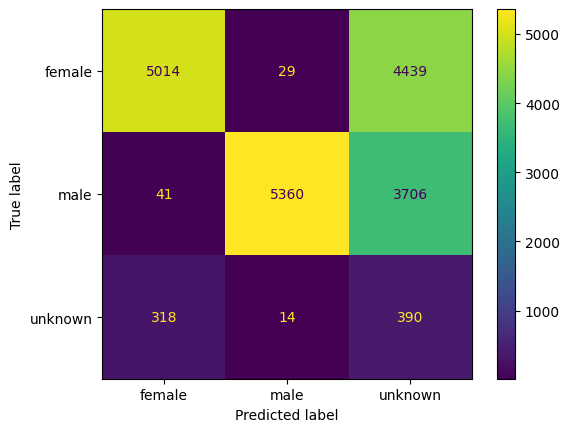

In [72]:
#4pt
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=patients_df['Gender'].unique())
disp.plot()
plt.show()


Plot the confusion matrix, and then display the plot with `plt.show()` to visually check if the label names are correct.

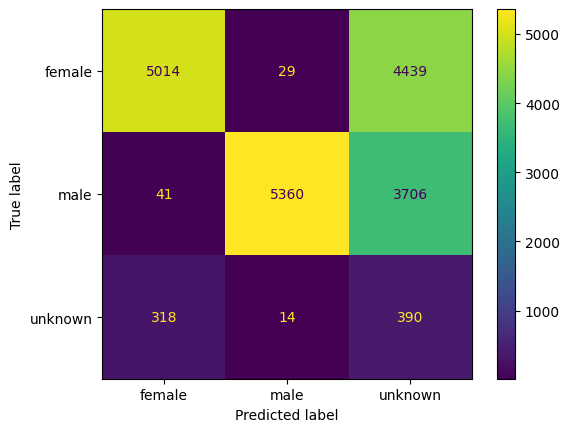

In [73]:
#1pt
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=patients_df['Gender'].unique())
disp.plot()
plt.show()


Filter the `patients_df` DataFrame to find records where the predicted gender is 'unknown' and the actual gender is 'female'. Then, print the number of such records to investigate the errors related to gender prediction for Dutch names.
Then display the first 3 rows of the `female_unknown_df` DataFrame to investigate the records where the predicted gender is 'unknown' but the actual gender is 'female'.*italicized text*

In [74]:
#5pt
print(patients_df[(patients_df['Predicted_Gender_3'] == 'unknown') & (patients_df['Gender'] == 'female')].shape[0])
female_unknown_df = patients_df[(patients_df['Predicted_Gender_3'] == 'unknown') & (patients_df['Gender'] == 'female')]
female_unknown_df.head(3)


4439


,First_Name,Last_Name,Institution,Department,Year,Birth_Place,Gender,Predicted_Gender,Predicted_Gender_3
2,Woutertje,Bosch,Buitengasthuis,Vrouwen Zieken,1820,Amsterdam,female,unknown,unknown
5,Alijda,Vloker,Buitengasthuis,Vrouwen Veneriek,1820,Amsterd,female,unknown,unknown
16,Anna Alijda,Somer,Buitengasthuis,Vrouwen Verband,1820,Amsterdam,female,unknown,unknown


## Email to the Amsterdam City Archive (10 pts)

The Amsterdam City Archive has asked you to share the results from Project 1, as they are considering incorporating the gender data into their own database. Based on the additional analysis you conducted in Project 2, write a 300-word email to the archivist explaining your results and addressing key points they should consider when using this data in their work.

In your email, address the following:

- Data Limitations: Explain the challenges and limitations of using name-based gender prediction methods in historical datasets, especially with Dutch names.What factors might affect the accuracy of gender predictions, and why?

- Describe the extra check you did in Project 2 by comparing the gender predictions with actual gender data (female vs. male patients) from the patientenregisters. Explain how this analysis showed that the gender guesser struggled in certain cases.

- Any other issues you believe would be important.

Your goal is to provide the archivist with clear, practical advice, helping them understand the limitations and potential issues with the data, and how they can handle and interpret it more effectively.


In [75]:
# 10pts

Dear Mr. Visser,

Thank you for taking us for a visit to the Amsterdam Archival Centre. It was informative and fascinating to know about so many new things.

This email is concerning the findings from Projects 1 and 2. I hope this information will benefit you, considering that the Amsterdam City Archive would incorporate gender data into the Amsterdam City Archive database.

In Project 1, I used name-based gender prediction to categorise individuals on a gender basis, but with the results, we faced limitations, particularly with Dutch names. As gender prediction tools typically rely on modern names, they differ significantly from historical names. Also, alot of Dutch names are unisex, or their gender connotations have changed over time. They are making gender prediction a bit different to predict the correct gender. Furthermore, names from non-dutch or minority cultural backgrounds also affected the classification.

To assess accuracy, I conducted another analysis in Project 2. I compared my predicted gender information from the patient register file, categorising patients as male and female. This comparison highlighted cases where the gender guesser struggled, especially with uncommon names or names that were more gender-neutral in the historical context. I observed that even though the tool performed well with many names, it might be less effective with nuanced or culturally specific names.

To conclude, if we incorporate this gender data, I believe it should be regarded as an auxiliary layer rather than a definitive indicator of gender. Furthermore, cross-referencing the gender predictions with other content-based records may enhance accuracy.

Again, thank you for allowing me to analyse this database. I am happy to discuss these findings further.

# Project 3: Different Data (BONUS - up to 20 points)

Only a couple of years ago, Tobias had to handcode a lot of things to write http://digitalhumanities.org:8081/dhq/vol/12/2/000377/000377.html. The article tried to deconstruct gender in a historical dataset. Now, reimplementing some of its main ideas is a matter of a couple of lines of code - thanks to advances in scikit-learn. So, redoing his analyis is your next mini project.


First, download the relevant dataset from https://zenodo.org/records/31026/files/MiddlesexVagrants1777-1786v1.1.csv?download=1/ and open it in a spreadsheet editor so that you can see the complexity of the dataset.



Complete the next cell to create `df_vagrant`. Load the dataset from the provided URL into a Pandas DataFrame and display the first few rows to get an overview of its contents.  Please observe how missing entries in `df_vagrant` do not appear as missing to Pandas, as they are encoded in particular ways with entries like '[unknown]', as you can see in the above print-out.

Also, get more details about the dataset, such as the number of entries, column names, and data types. This will help you understand the dataset's overall structure and any potential data quality issues (e.g., missing values or incorrect data types).


In [76]:
#1pt

file = "https://zenodo.org/records/31026/files/MiddlesexVagrants1777-1786v1.1.csv?download=1"
df_vagrant = pd.read_csv(file)
display(df_vagrant.head())

#Dataset details
print(f"Number of entries: {df_vagrant.shape[0]}")
print(f"Column names: {df_vagrant.columns.tolist()}")
print(f"Data types:\n{df_vagrant.dtypes}")


,Vagrant ID Number,Given Names,Surname,Gender of Lead Vagrant,Relationship to Lead Vagrant,Number of People in Group,Person Type,Vagrant Category,Session Start Day,Session Start Month,...,Georeference (Taken From),Georeference (Conveyed To),Settlement (Micro Level),Settlement (Area Level),Settlement County,Settlement Country,Settlement Georeference (Micro Level),Settlement Georeference (Area Level),Settlement Georeference (County),Settlement Georeference (Country)
0,6625.1.1,Mitchell,Bruce,M,[lead vagrant],1,Solo Male,City Vagrant,12,9,...,51.5321;-0.1066,51.699888;-0.028486,Pomona,[n/a],Zetland,Scotland,59;-3.25,[n/a],60.33333;-1.33333,56;-4
1,6720.1.1,John,Drivee,M,[lead vagrant],1,Solo Male,City Vagrant,12,9,...,51.5321;-0.1066,51.699888;-0.028486,Pomona,[n/a],Zetland,Scotland,59;-3.25,[n/a],60.33333;-1.33333,56;-4
2,8352.1.1,Peter,Smith,M,[lead vagrant],1,Solo Male,City Vagrant,5,5,...,51.5321;-0.1066,51.683333;-0.233333,[unknown],[n/a],Orkney,Scotland,[unknown],[n/a],59;-3,56;-4
3,5750.1.1,Thomas,Herry,M,[lead vagrant],1,Solo Male,City Vagrant,19,2,...,51.5321;-0.1066,51.699888;-0.028486,Isle of Sanday,[n/a],Orkney,Scotland,59.2581;-2.5683,[n/a],59;-3,56;-4
4,5265.1.1,James,Guttery,M,[lead vagrant],1,Solo Male,City Vagrant,8,1,...,51.5321;-0.1066,51.699888;-0.028486,[unknown],[n/a],Orkney,Scotland,[unknown],[n/a],59;-3,56;-4


Number of entries: 14789
Column names: ['Vagrant ID Number', 'Given Names', 'Surname', 'Gender of Lead Vagrant', 'Relationship to Lead Vagrant', 'Number of People in Group', 'Person Type', 'Vagrant Category', 'Session Start Day', 'Session Start Month', 'Session Start Year', 'Session End Day', 'Session End Month', 'Session End Year', 'Session # (out of 8 annually)', 'URL of Primary Source', 'Magistrate Name', 'Taken From', 'Conveyed To', 'Georeference (Taken From)', 'Georeference (Conveyed To)', 'Settlement (Micro Level)', 'Settlement (Area Level)', 'Settlement County', 'Settlement Country', 'Settlement Georeference (Micro Level)', 'Settlement Georeference (Area Level)', 'Settlement Georeference (County)', 'Settlement Georeference (Country)']
Data types:
Vagrant ID Number                        object
Given Names                              object
Surname                                  object
Gender of Lead Vagrant                   object
Relationship to Lead Vagrant             obj

In the article, I had to do a lot of cleaning to make sense of this dataset, which you can ignore.

Remove columns from the dataset that are not relevant for predicting gender or could introduce noise into the analysis. Specifically, drop the following columns:

"Relationship to Lead Vagrant"
"URL of Primary Source"
"Vagrant ID Number"
"Georeference (Taken From)", "Georeference (Conveyed To)"
"Settlement (Micro Level)", "Settlement (Area Level)", "Settlement Georeference (Micro Level)", "Settlement Georeference (Area Level)", "Settlement Georeference (County)", "Settlement Georeference (Country)"
"Session End Year", "Session End Month", "Session End Day", "Session Start Day", "Session Start Month"
"Session # (out of 8 annually)"
These columns provide additional metadata or geographic information that is not directly relevant to the gender prediction task. After dropping these columns, verify that the dataset contains only the useful features for analysis by displaying the first few rows of the cleaned dataset `df_vagrant_clean`.

In [77]:
#2pt
columns_to_drop = ["Relationship to Lead Vagrant", "URL of Primary Source", "Vagrant ID Number",
                   "Georeference (Taken From)", "Georeference (Conveyed To)",
                   "Settlement (Micro Level)", "Settlement (Area Level)", "Settlement Georeference (Micro Level)",
                   "Settlement Georeference (Area Level)", "Settlement Georeference (Area Level)", "Settlement Georeference (County)",
                   "Settlement Georeference (Country)", "Session End Year", "Session End Month", "Session End Day",
                   "Session Start Day", "Session Start Month", "Session # (out of 8 annually)"]
df_vagrant_clean = df_vagrant.drop(columns=columns_to_drop)
display(df_vagrant_clean.head())

,Given Names,Surname,Gender of Lead Vagrant,Number of People in Group,Person Type,Vagrant Category,Session Start Year,Magistrate Name,Taken From,Conveyed To,Settlement County,Settlement Country
0,Mitchell,Bruce,M,1,Solo Male,City Vagrant,1784,John Hart,House,Cheshunt,Zetland,Scotland
1,John,Drivee,M,1,Solo Male,City Vagrant,1784,John Hart,House,Cheshunt,Zetland,Scotland
2,Peter,Smith,M,1,Solo Male,City Vagrant,1785,P LeMesurier,House,Ridge,Orkney,Scotland
3,Thomas,Herry,M,1,Solo Male,City Vagrant,1784,Richard Clark,House,Cheshunt,Orkney,Scotland
4,James,Guttery,M,1,Solo Male,City Vagrant,1784,Nathaniel Newnham,House,Cheshunt,Orkney,Scotland


This looks much better. We want to investigate whether we can predict the gender of the lead vagrant. Do you remember how to count values per column - in this case `df_vagrant_clean['Gender of Lead Vagrant']`? Do it in the next cell.

In [78]:
#1pt
df_vagrant_clean['Gender of Lead Vagrant'].value_counts()

,count
Gender of Lead Vagrant,
F,5979
M,5550
[unknown],3260


The data assumes that gender is binary from what we can see, which is not correct. I discuss in the paper how to move beyond this assumption. For this exercise, we ignore this and move on, as it would be too complicated for a training exercise.

But we do take into consideration that our gender-prediction should assume three values for the target variables, as next to `M` and `F`, we have `[unknown]`. This is called a multi-class classification (https://en.wikipedia.org/wiki/Multiclass_classification). Ask your teacher in the lab about this.

The next step is to take out the target variable from the prediction input, as we have already done a number of times by now. We also want to remove `Person Type`, as it clearly contains information about the gender. You might also want to remove others? Feel free to play a bit.

Complete the next cell.

In [79]:
#1pt
df_vagrant_clean = df_vagrant_clean.drop(columns=['Gender of Lead Vagrant', 'Person Type', 'Vagrant Category'])
display(df_vagrant_clean.head())

,Given Names,Surname,Number of People in Group,Session Start Year,Magistrate Name,Taken From,Conveyed To,Settlement County,Settlement Country
0,Mitchell,Bruce,1,1784,John Hart,House,Cheshunt,Zetland,Scotland
1,John,Drivee,1,1784,John Hart,House,Cheshunt,Zetland,Scotland
2,Peter,Smith,1,1785,P LeMesurier,House,Ridge,Orkney,Scotland
3,Thomas,Herry,1,1784,Richard Clark,House,Cheshunt,Orkney,Scotland
4,James,Guttery,1,1784,Nathaniel Newnham,House,Cheshunt,Orkney,Scotland


There are many categorical features in the dataset. We need to encode their labels, following https://www.kaggle.com/discussions/getting-started/61148.

The dataset contains many categorical features, and we need to encode them to make them suitable for machine learning. Before encoding, you must first identify all the categorical columns in the dataset.

To do this, you can find the categorical columns by distinguishing them from the numeric ones. Use the appropriate methods to extract the column names that correspond to categorical data types.

Once you've identified the categorical columns, proceed to the next step of encoding them for the model. Make sure to list the categorical columns correctly in the cat_cols variable.

In [80]:
#2pt
cat_cols = df_vagrant_clean.select_dtypes(include=['object']).columns.tolist()
print(cat_cols)

['Given Names', 'Surname', 'Magistrate Name', 'Taken From', 'Conveyed To', 'Settlement County', 'Settlement Country']


Now, `cat_cols` contains the `df_vagrant_clean` categorical columns.

The `Given Names` column is likely important for predicting gender, as some names can help us identify it. To begin, check the first 20 entries of the `Given Names` column to ensure the data is formatted correctly.

Complete the following cell to display the first 20 entries of the `Given Names` column.

In [81]:
#1pt
df_vagrant_clean['Given Names'].head(20)

,Given Names
0,Mitchell
1,John
2,Peter
3,Thomas
4,James
5,Robert
6,Laurence
7,Betty
8,John
9,[Child]


There are lots of first names and also other indicators like `[wife]` that should help us identify the gender. In the article, I discuss the interesting history of first name genders. Check online and you will find a lot of surprises about what genders these generally indicate.

In other languages, you now have to start doing a lot of cleaning work to identify and deal with these categorical variables. In particular, we have to dummy-code them, as the machine learning expects numbers and not values (https://en.wikipedia.org/wiki/Dummy_variable_(statistics). This is a nice video: https://www.youtube.com/watch?v=0s_1IsROgDc.

Fortunately, the Pandas-function `pd.get_dummies()` makes life easy for us, as it automatically identifies and converts dummy columns. Run `pd.get_dummies()` with `sparse = False` to create `df_vagrant_dummies`. What does `sparse = False` do?

In [82]:
#1pt
df_vagrant_dummies = pd.get_dummies(df_vagrant_clean, sparse=False)
df_vagrant_dummies.head()

,Number of People in Group,Session Start Year,Given Names_Aaron,Given Names_Abigail,Given Names_Abraham,Given Names_Abram,Given Names_Adam,Given Names_Agnes,Given Names_Alexander,Given Names_Aley,...,Settlement Country_England,Settlement Country_Gibraltar,Settlement Country_Holland,Settlement Country_Ireland,Settlement Country_Isle of Man,Settlement Country_Scotland,Settlement Country_Sweden,Settlement Country_Wales,Settlement Country_[illegible],Settlement Country_[unknown]
0,1,1784,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,1,1784,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,1,1785,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,1,1784,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1,1784,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


What does sparse false do?

Check the first couple of entries of `df_vagrant_dummies` and see that `pd.get_dummies` knows how to select the right `object` columns and skip the other columns that are `int64`, etc.

In [83]:
#1pt
pd.get_dummies(df_vagrant_clean, sparse=False).head(5)


,Number of People in Group,Session Start Year,Given Names_Aaron,Given Names_Abigail,Given Names_Abraham,Given Names_Abram,Given Names_Adam,Given Names_Agnes,Given Names_Alexander,Given Names_Aley,...,Settlement Country_England,Settlement Country_Gibraltar,Settlement Country_Holland,Settlement Country_Ireland,Settlement Country_Isle of Man,Settlement Country_Scotland,Settlement Country_Sweden,Settlement Country_Wales,Settlement Country_[illegible],Settlement Country_[unknown]
0,1,1784,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,1,1784,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,1,1785,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,1,1784,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1,1784,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


`pd.get_dummies` has added a lot of columns. One for each `Given Names` with a separator `_`. In fact, in my example I have now a total of 6,675 columns. These are too many columns, and we have to find ways to reduce the number of columns, which are also in the paper. There are not enough data entries to cover all these data points.

But for the purpose of this exercise, we just move on and encode the target variable next. We want to use `LabelEncoder` for this, which translates our three entries into numbers: https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/. This looks much easier than the complicated one-hot encoding and dummy variable from earlier. Why did we not do it there as well? Well, LabelEncoder assumes that there is an order in the encoded variable (https://medium.com/@chandradip93/difference-between-one-hot-encoding-and-label-encorder-5ad16ea719bc). There is definitely no order in all the given names. It might work with the kind of machine learning algorithm we want to use, because it might ignore the order but we want to be prepared for different algorithms. While there is also no order in the gender, for the target variable we can use `LabelEncoder`, as we are not doing calculations with it. It is the target variable.

Complete the next cell.

In [84]:
#3pt

from sklearn.preprocessing import LabelEncoder
target_encoder = LabelEncoder()
df_vagrant['Gender of Lead Vagrant'] = target_encoder.fit_transform(df_vagrant['Gender of Lead Vagrant'])
print('Encodings: ', list(zip(target_encoder.classes_, target_encoder.transform(target_encoder.classes_))))


Encodings:  [('F', 0), ('M', 1), ('[unknown]', 2)]


Can you see how `LabelEncoder` assigns numbers? As far as I can see, it just does so by order of appearance.

Now please create `X` and target `y` for inputs into our machine learning algorithms. `X` is based on `df_vagrant_dummies.values` and y on `df_vagrant['Gender of Lead Vagrant'].values`.

Split the data into features and target variable.

In [85]:
#1pt
X = df_vagrant_dummies.values
y = df_vagrant['Gender of Lead Vagrant'].values


Split the dataset into training and test by completing the next cell.

In [86]:
#1pt
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Complete the next cell to train a `RandomForest` classifier with `n_estimators=100` and `max_depth=3`.

In [87]:
#1pt
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3)


Create a variable `y_pred` with the predictions of `rf_model` over `X_test`.

In [88]:
#1pt
y_pred = rf_model.predict(X_test)

Following https://www.w3schools.com/python/python_ml_confusion_matrix.asp, we can create a confusion matrix to determine the performance.

Now that the data is prepared and the model has been trained, you will evaluate its performance using a confusion matrix. The confusion matrix helps you understand how well your model is making predictions, by comparing the predicted labels to the actual labels.

1.   Use `metrics.confusion_matrix` from sklearn to generate the confusion matrix based on the predicted values (y_pred) and the true values (y_test).
2.   Display the Confusion Matrix: Use `metrics.ConfusionMatrixDisplay` to plot the confusion matrix. Make sure the display labels reflect the encoded gender values.


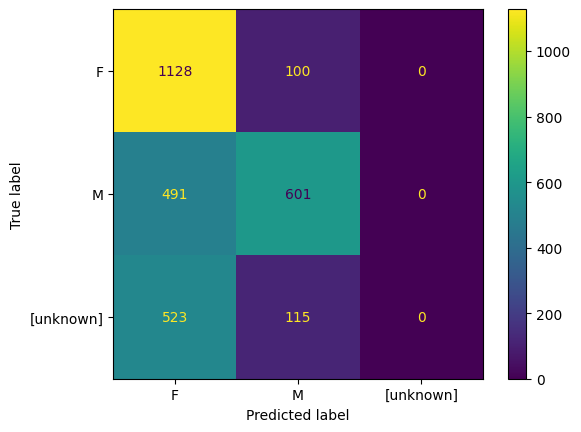

In [89]:
#2pt
import matplotlib.pyplot as plt
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_encoder.classes_)
disp.plot()
plt.show()


Compute the accuracy of the model using metrics.accuracy_score and print the result.


In [90]:
#Keep cell
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')

Accuracy: 0.5845165652467884


The model has an impressive looking accuracy but it seems to not be able to identify `[unknown]` genders.

Let's look at the feature importance, which is a nice feature of random forests. Let's create a dataframe to collect the feature importances and arrange them in order.

Run the cell below.

In [91]:
#Keep cell

df_features = pd.DataFrame(list(zip(df_vagrant_dummies.columns, rf_model.feature_importances_)), columns =['Feature', 'Importance'])
df_features[['Feature','ID']] = df_features['Feature'].str.split('_',expand=True)
df_features = df_features.groupby(['Feature'])['Importance'].sum().reset_index().sort_values('Importance', ascending = False)
df_features

,Feature,Importance
1,Given Names,0.569834
5,Settlement Country,0.106360
6,Settlement County,0.075556
2,Magistrate Name,0.075203
8,Taken From,0.063012
0,Conveyed To,0.043859
7,Surname,0.038715
3,Number of People in Group,0.018615
4,Session Start Year,0.008845


As suspected, `Given Names` is important.

Run the cell below and see that the `Given Names` dominates the decision-making.

<Axes: xlabel='Feature'>

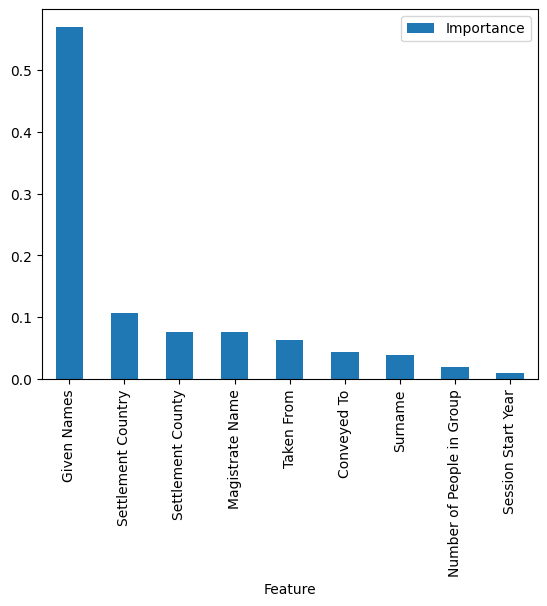

In [92]:
#Keep cell

df_features.plot.bar(x='Feature', y='Importance', rot=90)

In the paper, I develop the idea of analysing the whole dataset to understand the common errors. Others have used the idea of algorithmic errors to analyse the boundary cases where human materials do not compute. https://journals.sagepub.com/doi/full/10.1177/20539517211069891 develop a theory of using errors to 'point us to deeper and more ambiguous [cultural] situations where interpretation is hard and explication becomes both necessary and interesting'. https://journals.sagepub.com/doi/full/10.1177/20539517221131290 builds on this work and states that 'failed predictions can be productively used to identify rich cases for qualitative analysis'.

Run the following cell to create a dataframe `df_errors`, which contains the misclassification of `rf_model` for the whole dataset. Try and understand what is going on.

In [93]:
#Keep cell

y_pred_all = rf_model.predict(X)
print(f'Accuracy for the whole dataset: {metrics.accuracy_score(y, y_pred_all)}')

#To better read the target labels and predictions, we inverse the transformations back to the original values
df_vagrant['Pred'] = target_encoder.inverse_transform(y_pred_all) #[target_encoder.classes_[y_] for y_ in y_pred_all]
df_vagrant['Gender of Lead Vagrant'] = target_encoder.inverse_transform(df_vagrant['Gender of Lead Vagrant'].values) #[target_encoder.classes_[y_] for y_ in df_vagrant['Gender of Lead Vagrant'].values]

df_errors = df_vagrant[df_vagrant['Gender of Lead Vagrant'] != df_vagrant['Pred']]
df_errors.shape

Accuracy for the whole dataset: 0.5782676313476233


(6237, 30)

Print out 20 examples from the error dataset.

In [94]:
#1pt
df_errors.head(20)

,Vagrant ID Number,Given Names,Surname,Gender of Lead Vagrant,Relationship to Lead Vagrant,Number of People in Group,Person Type,Vagrant Category,Session Start Day,Session Start Month,...,Georeference (Conveyed To),Settlement (Micro Level),Settlement (Area Level),Settlement County,Settlement Country,Settlement Georeference (Micro Level),Settlement Georeference (Area Level),Settlement Georeference (County),Settlement Georeference (Country),Pred
6,460.1.1,Laurence,Least,M,[lead vagrant],1,Solo Male,Middlesex Vagrant,17,9,...,51.699888;-0.028486,Wisedale,[n/a],Orkney,Scotland,[unknown],[n/a],59;-3,56;-4,F
9,1914.2.2,[Child],Scarlet,[unknown],[Child],2,Dependent,City Vagrant,7,12,...,51.699888;-0.028486,[unknown],[n/a],Caithness,Scotland,[unknown],[n/a],58.416667;-3.5,56;-4,F
12,4208.1.1,Donald,Ross,M,[lead vagrant],1,Solo Male,Westminster Vagrant,20,2,...,51.683333;-0.233333,[unknown],[n/a],Ross-shire,Scotland,[unknown],[n/a],57.66667;-5,56;-4,F
13,10228.2.2,[Child],McKenzie,[unknown],[Child],2,Dependent,Westminster Vagrant,8,12,...,51.683333;-0.233333,[unknown],[n/a],Ross-shire,Scotland,[unknown],[n/a],57.66667;-5,56;-4,F
20,881.1.1,Alexander,McFerson,M,[lead vagrant],1,Solo Male,City Vagrant,16,7,...,51.699888;-0.028486,Inveran,[n/a],Banffshire,Scotland,57.93333;-4.4,[n/a],57.5;-3.08333,56;-4,F
22,4091.1.1,Robert,Innis,M,[lead vagrant],1,Solo Male,Westminster Vagrant,20,2,...,51.699888;-0.028486,Elgin,[n/a],Morayshire,Scotland,57.65;-3.33333,[n/a],57.41667;-3.25,56;-4,F
23,468.2.2,[Child],Middleston,[unknown],[Child],2,Dependent,City Vagrant,17,9,...,51.683333;-0.233333,Medlick,Aberdeen,Aberdeenshire,Scotland,57.14369;-2.09814,57.14369;-2.09814,57.16667;-2.66667,56;-4,M
26,2299.2.2,[Child],McKenzie,[unknown],[Child],2,Dependent,Westminster Vagrant,9,7,...,51.683333;-0.233333,[unknown],Aberdeen,Aberdeenshire,Scotland,[unknown],57.14369;-2.09814,57.16667;-2.66667,56;-4,F
30,1182.2.3,[Child],Anderson,[unknown],[Child],3,Dependent,City Vagrant,24,2,...,51.683333;-0.233333,[unknown],[n/a],Aberdeenshire,Scotland,[unknown],[n/a],57.16667;-2.66667,56;-4,F
31,1182.3.3,[Child],Anderson,[unknown],[Child],3,Dependent,City Vagrant,24,2,...,51.683333;-0.233333,[unknown],[n/a],Aberdeenshire,Scotland,[unknown],[n/a],57.16667;-2.66667,56;-4,F


In the next cell, use two examples from the error dataset `df_errors` to try and explain why they might have failed. Check, e.g., what happens with our most reliable feature that the predictions got confused.

#5pt
**Explanation of two error examples**


Answer: I have taken index 12 and 13.

In example one (index 12), the name Donald was male but was predicted as female, and this can happen because of limited training data where the model might not have encountered enough examples of the name “Donald” during training and data imbalance where there would be more female examples. The other reason could be that the surname is Ross, generally a female name, so the training model predicted it as female. The third could be name ambiguity, as Donald is usually considered a male name, but it could be that in some other cultures, it is used for females.

The name is not mentioned in the second example (index 13). Instead, it is written as a child, and its gender is unknown, but it was still predicted to be female. The reason could be that the missing value defaulted to the more frequent gender (female) in the dataset or the surname McKenzie, which is commonly a female name that was considered and predicted as female.

These two errors happened due to data limitations, name ambiguity and other contextual factors.